In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import layers

In [3]:
data_train_path='dataSet/Training'
data_train_test='dataSet/Test'
data_train_validation='dataSet/validation'

img_widht =180
img_height =180

In [4]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_widht,img_height),
    batch_size=32,
    validation_split=False
)


Found 115 files belonging to 2 classes.


In [5]:
data_cat=data_train.class_names
print(data_cat)

['High severe', 'Low severe']


In [6]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_train_validation,
    shuffle=False,
    image_size=(img_widht,img_height),
    batch_size=32,
    validation_split=False
)

Found 21 files belonging to 2 classes.


In [7]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_train_test,
    shuffle=False,
    image_size=(img_widht,img_height),
    batch_size=32,
    validation_split=False
)

Found 21 files belonging to 2 classes.


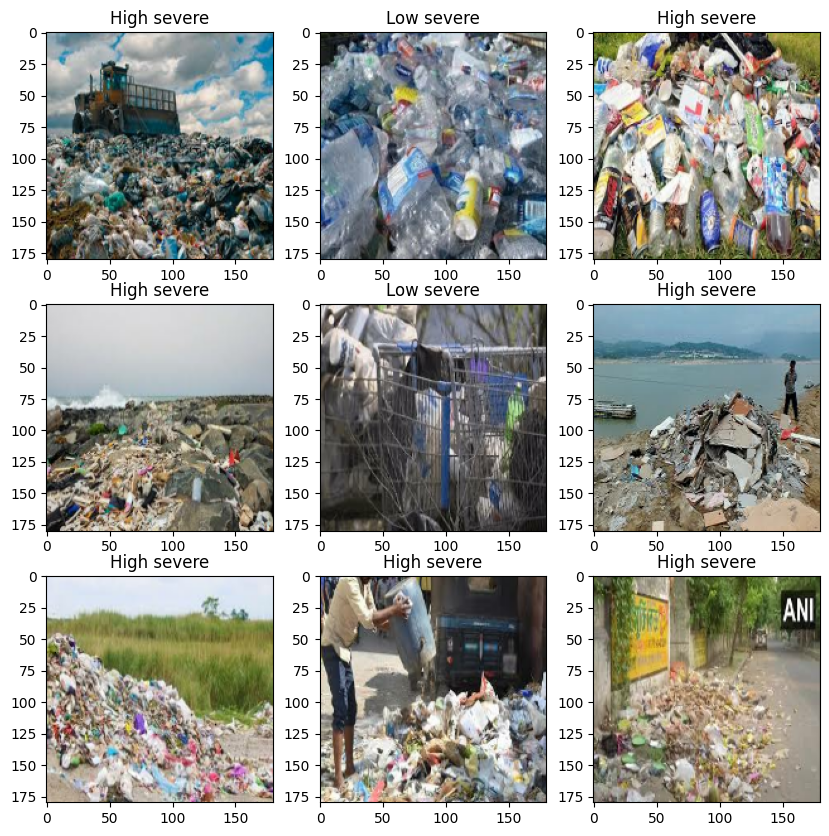

In [24]:
plt.figure(figsize=(10,10))
for images,labels in data_train.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])

In [25]:
model=keras.Sequential(
    [
        
        layers.Rescaling(1./255),
        layers.Conv2D(16,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(128    ),
        layers.Dense(len(data_cat))
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


model.fit(data_train,validation_data=data_val,epochs=25,batch_size=32,verbose=1)

Epoch 1/25
4/4 [==============================] - 3s 440ms/step - loss: 2.9808 - accuracy: 0.6174 - val_loss: 1.1070 - val_accuracy: 0.4762
Epoch 2/25
4/4 [==============================] - 1s 356ms/step - loss: 1.0886 - accuracy: 0.3913 - val_loss: 0.9415 - val_accuracy: 0.5238
Epoch 3/25
4/4 [==============================] - 1s 312ms/step - loss: 0.7091 - accuracy: 0.6522 - val_loss: 0.7101 - val_accuracy: 0.5238
Epoch 4/25
4/4 [==============================] - 1s 336ms/step - loss: 0.6070 - accuracy: 0.6696 - val_loss: 0.7458 - val_accuracy: 0.5238
Epoch 5/25
4/4 [==============================] - 1s 303ms/step - loss: 0.5793 - accuracy: 0.6696 - val_loss: 0.7382 - val_accuracy: 0.5238
Epoch 6/25
4/4 [==============================] - 1s 326ms/step - loss: 0.5332 - accuracy: 0.6696 - val_loss: 0.7159 - val_accuracy: 0.5238
Epoch 7/25
4/4 [==============================] - 1s 318ms/step - loss: 0.4992 - accuracy: 0.8783 - val_loss: 0.7660 - val_accuracy: 0.5238
Epoch 8/25
4/4 [====

In [31]:
image='images1.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_widht,img_height))
image_arr=tf.keras.utils.img_to_array(image)
image_bat=tf.expand_dims(image_arr,0)


In [32]:
predict=model.predict(image_bat)

1/1 [==============================] - 0s 50ms/step


In [33]:
score =tf.nn.softmax(predict)

In [34]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is High severe with accuracy of 98.85


In [35]:
model.save("garbage_classifier.h5")